___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 4<br><br>Classification with ANN<br><br>Cancer Data<br><h1>

__DL icin playground sitesi :__

https://playground.tensorflow.org/#activation=relu&batchSize=20&dataset=xor&regDataset=reg[…]se&problem=classification&initZero=false&hideText=false

# Keras Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Classification problemlerine ornek olmasi icin sklearn' den import ettigimiz kanser ile alakali bir datasetini kullanacagiz :

In [3]:
from sklearn.datasets import load_breast_cancer

Datasetini import ettikten sonra bir degiskene atadik :

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Describe ile datanin ozelliklerine baktik. Datada kanserli hucrenin capi, alani gibi ozellikler var. Bu ozelliklere gore kisinin kanser olup olmama durumuna karar verecegiz :

In [6]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Feature isimleri ile datayi birlestirerek DataFrame' e cevirdik :

In [8]:
#@title
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


Target label datada yok, onu da DataFrame' e cevirip 'Cancer' ismini verdik :

In [9]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


Data ile target label' i concat islemi ile birlestirdik :

In [10]:
frames = [df_feat, df_target]
df = pd.concat(frames,axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,0


## Exploratory Data Analysis and Visualization

In [11]:
df.shape

(569, 31)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304
mean fractal dimension,569.000,0.063,0.007,0.050,0.058,0.062,0.066,0.097


In [14]:
df.Cancer.value_counts()   # Balanced bir data diyebiliriz. 

1    357
0    212
Name: Cancer, dtype: int64

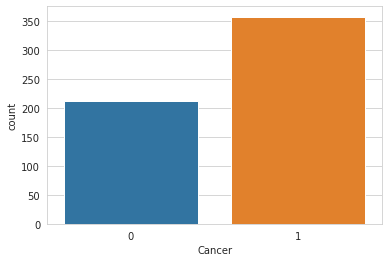

In [15]:
sns.countplot(df["Cancer"])

Heatmap' te beyazlarin yogun oldugu alanlar var. Bunlar yaricap ve captan uretilmis degerler oldugu icin bazi sutunlarla corr iliskileri fazla. Bunlar multicollionarity' e sebep olmuslar. Bu yuzden asagida bu sutunlari dusurduk :

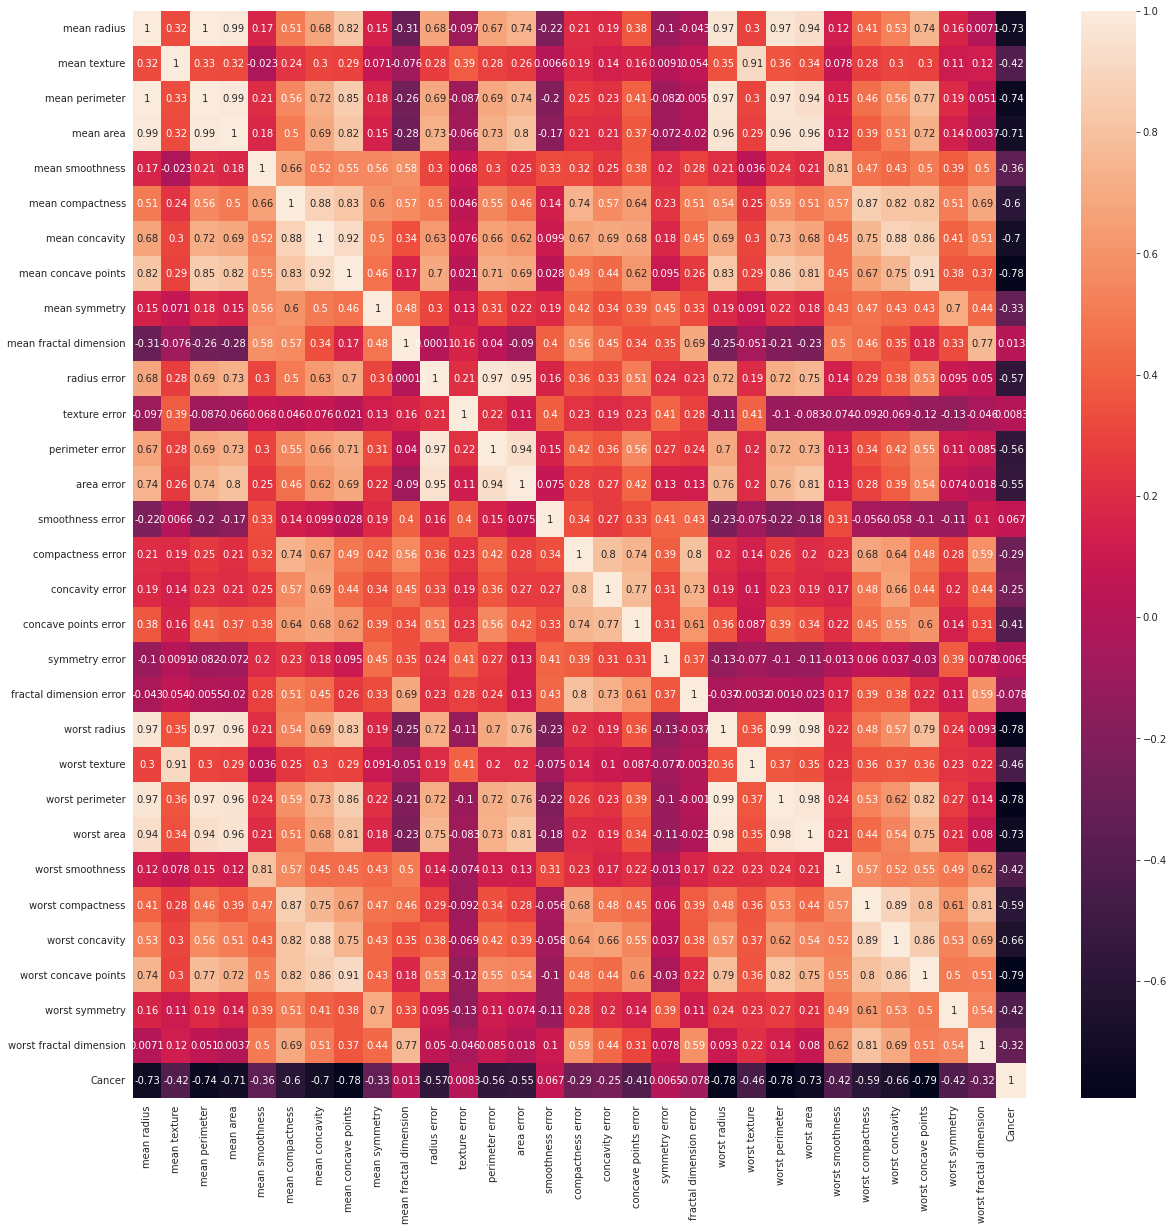

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [17]:
drop_list = ["worst perimeter", "worst area", "perimeter error", "area error", "mean perimeter", "mean area"]

In [18]:
df=df.drop(drop_list, axis=1)

In [19]:
df.shape

(569, 25)

Target label' i listeden dusurerek diger feature' larin target label ile olan corr iliskilerine baktik. Gorsele gore ilk 4 sutun arttikca kanser olma riski artarken, diger feature' lar arttikca ise kanser riski azaliyor :

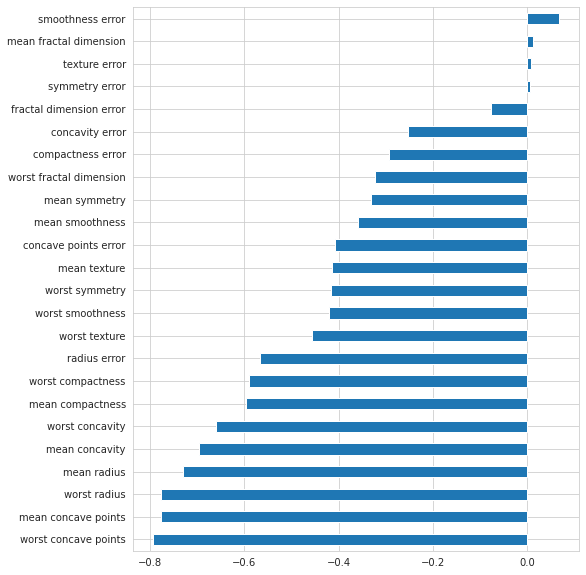

In [20]:
plt.figure(figsize = (8,10))
df.corr()['Cancer'].sort_values().drop("Cancer").plot(kind = "barh");

## Preprocessing of Data
- Train | Test Split, Scalling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [22]:
X = df.drop('Cancer', axis=1)
y = df['Cancer'].values

In [23]:
seed = 42

-- Data imbalanced degilse de stratify kullanilabilir --

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix   # classification metricleri
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [28]:
tf.__version__      # tensorflow version

'2.8.0'

In [29]:
X_train.shape

(512, 24)

In [30]:
X_test.shape

(57, 24)

Ilk giriste modele 24 feature (input) gelecek. Ilk hidden layer' da 30 nöron ile basladik. Nöron sayisi icin kesin bir sayi yok ama arastirmalara gore feature sayisinin 1.5 kati ile baslanabilir. Biz 30 ile baslayip yariya indirerek gittik, 36-18-9-1 sayilari da secilip skorlara bakilabilirdi.

ANN' de hidden layer' larda aktivasyon fonksiyonu olarak __relu__ secmek, Tanh ve sigmoid' e gore daha hizli sonuca ulasmayi sagliyor. 

Output layer' da aktivasyon fonksiyonu __sigmoid__ cunku binary bir classification yapacagiz. (Regression datasinda outputtaki aktivasyon fonksiyonuna bir sey yazmamistik bu yuzden default deger olan __linear__ secilmisti.)

Datamiz binary classification oldugu icin model.compile kisminda __binary_crossentropy__ sectik ve gormek istedigimiz skor metriklerini yazdik. (Virgul ile diger metrikleri de ekleyebiliriz (recall, f1 score gibi))

__input_dim__ ilk satira yazildigi icin agirlik atamasi bu asamada yapildi. Yazilmasa da olurdu fakat o zaman agirlik atamasi fit islemi esnasinda olurdu :

In [31]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

# Yukarida structure kurduk. Asagida ise modelin egitim esnasinda kullanacagi sistemi belirledik :

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

model.fit' in icinde shuffle diye bir parametre var ve bunun default degeri 'True'. Bunun anlami; 'Her epoch isleminden sonra datayi yeniden kar.' (RNN' de shuffle' i False yapacagiz)

__validation_split__ ile train datasinin __son__ kisminin 0.1' i alindi. Bunun haricinde kalan data her epoch' tan sonra datayi yeniden karılacak.

batch_size = 32, datadaki sample sayisi = 512 __--->__ Yani her epoch' ta 512 / 32 = 15 islem olacak.

__Asagida yapilan islem :__ Bir epoch icin ---> Her batch_size' da bir (32 satirda bir) backpropagation yapacak sekilde tum datayi 15 islem ile egitime soktu, loss ve accuracy skorlarini aldi. __(Buradaki loss ve accuracy skorlari her epoch' taki 15. islemin sonuclari)__ 

val_los ve val_accuracy skorlarini ise bir epoch' taki 15 islemin hepsi bittikten sonra buluyor.

__val_loss :__ Cost function' in sonucudur, azalmasi gerekir. Validation datasi ile alinan skorlari verir. Train datasi ile bir epoch' taki egitim biter, bulunan agirlik degerleri ile validation datasi egitime girer.

__val_accuracy :__ Validation datasina ait accuracy skordur. val_los yani hata azaldikca accuracy skoru artar.

In [32]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
15/15 [==============================] - 2s 48ms/step - loss: 0.7177 - accuracy: 0.3870 - val_loss: 0.6714 - val_accuracy: 0.6731
Epoch 2/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.6636 - accuracy: 0.6783 - val_loss: 0.6239 - val_accuracy: 0.8846
Epoch 3/1000
15/15 [==============================] - 0s 11ms/step - loss: 0.6176 - accuracy: 0.8109 - val_loss: 0.5760 - val_accuracy: 0.9423
Epoch 4/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.5744 - accuracy: 0.8435 - val_loss: 0.5411 - val_accuracy: 0.8654
Epoch 5/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.5300 - accuracy: 0.8696 - val_loss: 0.4991 - val_accuracy: 0.8462
Epoch 6/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.4841 - accuracy: 0.8696 - val_loss: 0.4351 - val_accuracy: 0.9231
Epoch 7/1000
15/15 [==============================] - 0s 15ms/step - loss: 0.4395 - accuracy: 0.8804 - val_loss: 0.3918 - val_accuracy: 0.9038
E

1000 * 15 = 15000  kere backpropagation oldu (agirliklar guncellendi).

Modelde 1231 tane parametre var :

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                750       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


Yukarida aldigimiz skorlari dataframe cevirerek inceledik. loss ve val_loss hata skorlarinin gittikce azaldigini, accuracy ve val_accuracy skorlarinin ise egitim ilerledikce arttigini goruyoruz.

In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.718,0.387,0.671,0.673
1,0.664,0.678,0.624,0.885
2,0.618,0.811,0.576,0.942
3,0.574,0.843,0.541,0.865
4,0.530,0.870,0.499,0.846


History ile aldigimiz degerleri gorsele aktardik. Alt ve ust kisimlarin ikisinde de az da olsa bir overfit durumu söz konusu.  

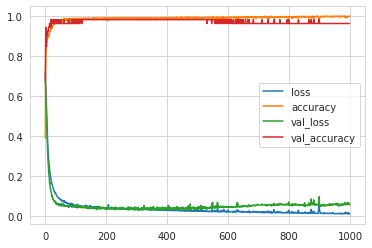

In [35]:
loss_df.plot();

-- __verbose__ bilgisayarin arkada hangi islemleri yaptiginin ayrintisini verir. Eger 0 dersek bize bu islemleri gostermez. --

Modelimiz egitildikten sonra X_test ve y_test' i modelimize soktuk. Asagida aldigimiz ciktilar, test datalarinin aldigi __loss function__ ve __accuracy__ degerleri. Yukarida modeli kurarken recall' i da eklemis olsaydik burada 3 cikti alacaktik:

In [36]:
model.evaluate(X_test, y_test, verbose=0)    

[0.2861265540122986, 0.9122806787490845]

Yukarida aldigimiz ciktilara asagida isim vererek daha anlasilir hale getirdik :

In [37]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.2861265540122986
accuracy :  0.9122806787490845


__y_pred = model.predict_classes(X_test) --->__ tensorflow 2.5' e kadar bu fonksiyon kullaniliyordu, sonradan bu fonksiyon kalkti. Bu fonksiyon classification datalarinda, buldugu olasilik degerlerini 0.5' in altinda ise 0' a; 0.5' in ustunde ise 1'e atayarak veriyordu. Yeni surumlerde kullanilan __y_pred = (model.predict(X_test)__ ise sadece predict uretiyor. Bu yuzden kendimiz manuel olarak __>0.5__ ise 1 sinifina ata diyerek atama islemini kendimiz yapiyoruz __(y_pred = (model.predict(X_test) > 0.5))__ :

In [38]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  2]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.94      0.92      0.93        36

    accuracy                           0.91        57
   macro avg       0.90      0.91      0.91        57
weighted avg       0.91      0.91      0.91        57



In [39]:
model.predict(X_test)

# Yukaridaki predict' in aciklamasi. Model bize 0 ile 1 arasinda predict' ler uretti.
# Onceki yontemde (predict_classes) 0.5'ten kucuk olanlari 0 classina buyuk olanlari 1 classina atiyordu.
# Burda atama yok, sadece degerler var.

array([[1.3437763e-09],
       [9.9999917e-01],
       [9.9988788e-01],
       [5.1415473e-11],
       [7.4049830e-04],
       [6.9389129e-01],
       [2.2728278e-17],
       [1.0000000e+00],
       [9.2633289e-01],
       [1.0000000e+00],
       [9.9999297e-01],
       [3.5835682e-16],
       [3.5647638e-10],
       [1.6552992e-09],
       [9.9998504e-01],
       [8.1034251e-08],
       [7.3650402e-01],
       [1.4717752e-01],
       [9.9999905e-01],
       [9.9999952e-01],
       [5.2425773e-14],
       [3.6394638e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.8757561e-09],
       [9.9999976e-01],
       [9.9998939e-01],
       [1.0000000e+00],
       [1.9505797e-12],
       [9.9999976e-01],
       [1.9363058e-01],
       [6.3978653e-08],
       [9.9999833e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [5.7581162e-01],
       [6.7982113e-09],
       [1.0000000e+00],
       [9.9999630e-01],
       [9.9998802e-01],
       [6.8536550e-01],
       [9.999997

In [40]:
model.predict(X_test)>0.5

# Yeni yontemde >0.5 diyerek bu islemi manuel olarak yapiyoruz.
# ML' de predict_proba 0 ve 1 olma olasiligini döndürüyordu ve biz index'le hangi olasiligi istiyorsak aliyorduk.
# Burda ise bu kodla sadece 1 olma olasiligini döndürüyor. (Binary classification icin)

array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True]])

### EarlyStopping

Yukarida olusturdugumuz modeli aynen kurup ek olarak early_stop ekleyip model performansina bakacagiz :

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [43]:
#The patience is often set somewhere between 10 and 100 (10 or 25 is more common), 
#but it really depends on your dataset and network.

Bir degisken icine bir object olusturarak EarlyStop fonksiyonunu tanimladik. EarlyStop yapmasi icin hangi veriyi takip etmesi gerektigini __monitor__ parametresi icine tanimladik (val_loss dedik, val_accuracy de diyebilirdik. Onemli olan validation datasinin aldigi skorlari takip etmek).

__patience=15 --->__ 15 satir boyunca skorlar degismezse dur.

In [44]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

Early stop ile modelimizi calistirdik :

In [45]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
15/15 [==============================] - 1s 16ms/step - loss: 0.7177 - accuracy: 0.3870 - val_loss: 0.6714 - val_accuracy: 0.6731
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6636 - accuracy: 0.6783 - val_loss: 0.6239 - val_accuracy: 0.8846
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6176 - accuracy: 0.8109 - val_loss: 0.5760 - val_accuracy: 0.9423
Epoch 4/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.5744 - accuracy: 0.8435 - val_loss: 0.5411 - val_accuracy: 0.8654
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5300 - accuracy: 0.8696 - val_loss: 0.4991 - val_accuracy: 0.8462
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4841 - accuracy: 0.8696 - val_loss: 0.4351 - val_accuracy: 0.9231
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4395 - accuracy: 0.8804 - val_loss: 0.3918 - val_accuracy: 0.9038
Epoch

Yukaridaki modeldeki gorselde x eksenindeki deger 1000' e kadar gitmisti yani 1000 epoch boyunca calismisti. Early stop ile tanimladigimiz bu modelde ise epoch degeri 90 civarlarinda iken egitim tamamlandi :

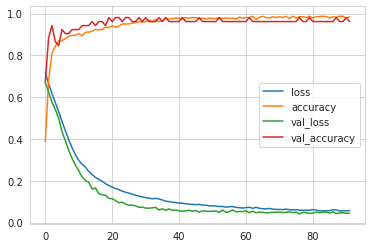

In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

Early stop kullanarak aldigimiz skorlar oncesine gore yukseldi. Cunku modelimiz overfit'e gitmisti, earl stop ile bunu engelledik :

In [47]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.10533837229013443
accuracy :  0.9649122953414917


__weighted_avg__ ile sayisi fazla olan class' a ait skorlar agirlikli olarak temsil edilir. Eger sayisi fazla olan class degerleri bizim icin onemliyse bu skoru baz almak gerekir. Sayisi az olan class' i on plana cikarmak istiyorsak ise __macro__ skoruna bakmaliyiz.

In [48]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



### learning_rate

Yukarida early stop ile olusturdugumuz modele learning_rate parametresini ekleyerek skorlarimizdaki degisimleri gozlemleyecegiz :

In [49]:
from tensorflow.keras.optimizers import Adam

Adam' in icine learning rate tanimlayacagimiz icin Adam' i import ettik. (compile icine tanimlarken import etmeye gerek yok)

Yukaridaki model ile ayni islemleri yaptik. Sadece default degeri 0.001 olan learning_rate' i 0.005 yaparak atacagimiz adimlarin buyukluklerini 5 kat artirdik ve bunu bir degiskene atadik. optimizer icine ise bu degiskeni verdik. __(learning_rate ile adimlar buyudugu icin global min' e daha hizli ulasma ihtimali artar, tasarruf saglanir)__ : 

In [50]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [51]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

early_stop sayesinde egitimimiz 46. epoch' ta tamamlandi :

In [52]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
15/15 [==============================] - 1s 13ms/step - loss: 0.6342 - accuracy: 0.7239 - val_loss: 0.5276 - val_accuracy: 0.8269
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4493 - accuracy: 0.8826 - val_loss: 0.3451 - val_accuracy: 0.8654
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.2938 - accuracy: 0.9000 - val_loss: 0.1818 - val_accuracy: 0.9423
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.2162 - accuracy: 0.9152 - val_loss: 0.1047 - val_accuracy: 1.0000
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1884 - accuracy: 0.9152 - val_loss: 0.0827 - val_accuracy: 1.0000
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1625 - accuracy: 0.9283 - val_loss: 0.0802 - val_accuracy: 0.9808
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.1362 - accuracy: 0.9457 - val_loss: 0.0889 - val_accuracy: 0.9615
Epoch

Onceki derste kurdugumuz regression modelindeki gibi eger 1000 epoch boyunca herhangi bir overfit durumu yoksa early stop' tan once learning rate parametresi ile oynamak mantikli olur; overfit tehlikesi olmadigi icin adimlarimizi buyuterek modeli iyilestirme yoluna gidebiliriz. Fakat burda kurdugumuz modelde overfit tehlikesi oldugu icin oncelikle early stop parametresi ile oynamak daha mantikli olur. Bu yuzden onceki datasetinde ilk olarak learning rate' i, sonra early stop' u degistirdik; bu datasetinde ise once early stop' u degistirerek overfit tehlikesini ortadan kaldirdik, sonrasinda learning rate ile iyilestirme yoluna gittik :

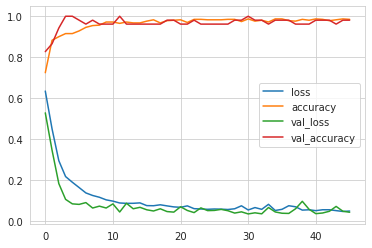

In [53]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [54]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.11213765293359756
accuracy :  0.9473684430122375


learning_rate artirildigi icin egitim daha hizli yapildi. Skorlarimiz learning_rate=0.001' e gore biraz dustu. Yukaridaki model 2 hata yapmisti, buradaki model ise 3 hata yapti (Boyle bir model icin learning_rate parametresi ile oynamaya gerek yok) :

In [55]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [56]:
from tensorflow.keras.layers import Dropout

Early stop kullanmadan dropout kullanarak bir model kuracagiz. Her layerdan sonra Dropout(0.5) diyerek her backpropagation' dan sonra datanin yarisini kapat komutunu vererek modelin ogrenmesini zorlastirdik (Modelin ezber yapmasini onleyerek overfit problemini cozmek amaclandi) :

In [57]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [58]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
15/15 [==============================] - 1s 14ms/step - loss: 0.7456 - accuracy: 0.4543 - val_loss: 0.6882 - val_accuracy: 0.5192
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.7121 - accuracy: 0.4891 - val_loss: 0.6632 - val_accuracy: 0.7692
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5848 - val_loss: 0.6408 - val_accuracy: 0.8269
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6567 - accuracy: 0.6522 - val_loss: 0.6197 - val_accuracy: 0.8269
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6397 - accuracy: 0.6826 - val_loss: 0.6078 - val_accuracy: 0.8269
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6317 - accuracy: 0.7130 - val_loss: 0.5679 - val_accuracy: 0.8654
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5954 - accuracy: 0.7326 - val_loss: 0.5461 - val_accuracy: 0.8846
Epoch

Early stop kullanmadan default degerlerle sadece dropout ekleyerek kurdugumuz modelde yine 1000 epoch boyunca islem yapildi. Bu islem sonucu elde edilen modelde herhangi bir overfit durumu ile karsilasmadik :

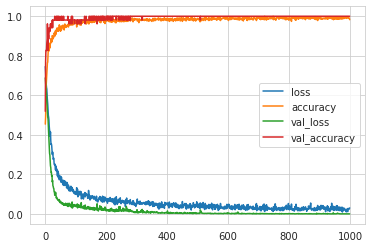

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

Dropout' tan aldigimiz skorlar, early stop' tan aldigimiz skorlar ile benzer. (Skorlari iyilestirme adina layer ve nöron sayilari ile de oynanabilirdi) :

In [60]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.1841096580028534
accuracy :  0.9649122953414917


In [61]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



## Cross Validation

**Keras models** can be used in **scikit-learn** by wrapping them with the **KerasClassifier** or **KerasRegressor** class.

To use these wrappers you must define a function that creates and returns your Keras sequential model, then pass this function to the build_fn argument when constructing the KerasClassifier class.

The constructor for the KerasClassifier class can take default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size.

In [62]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [63]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

CrossValidation ve GridSearch scikit_learn kutuphanesinin fonksiyonlaridir. Tensorflow ve Keras, Sequential modeller oldugu icin bunlar burada direk olarak uygulanamazlar. Bu yuzden modellerimizi scikit learn ambalaji ile sarilir ve sonra CrossValidate ve GridSearch islemlerine tabi tutulur. Bunun icin scikit learn' deki __KerasClassifier__ ve __KerasRegressor__ class' lari kullaniliyor. 

Bu class' lari kullanabilmek icin once bir fonksiyon yazilir. Bu fonksiyonun icine DL structer' i compile da dahil olmak uzere olusturulur ve bu islem sonunda bir object olusur (Yukarida classifier object' i olustu). 

Olusan bu classifier asagida __KerasClassifier__ icine verilince model sanki bir scikit_learn modeliymis gibi islem yapildi. KerasClassifier icine modeli fit ederken kullandigimiz batc_size, epoch gibi hyperparamtreler yazilabilir :

In [64]:
tf.random.set_seed(seed) # Yukarida input_dim vermedigimiz icin agirlik atamasini orda yapmadi.
                         # Fonksiyon bu satirda calisacagi icin seed' i burada tanimladik (built_classifier)

classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)

#Yukaridaki kodda model olustu, asagidaki kodda cross_validate islemi yapildi. 

scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)

# Asagidaki kodda alinan skorlari DataFrame' e cevirdik :

df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]

df_scores

,test_accuracy,test_precision,test_recall,test_f1
1,0.962,0.968,0.968,0.968
2,1.000,1.000,1.000,1.000
3,0.980,0.972,1.000,0.986
4,1.000,1.000,1.000,1.000
5,0.902,0.892,0.971,0.930
6,0.961,0.971,0.971,0.971
7,0.980,0.971,1.000,0.985
8,1.000,1.000,1.000,1.000
9,1.000,1.000,1.000,1.000
10,0.961,0.926,1.000,0.962


Yukaridaki CrossValidate isleminden aldigimiz skorlar tek seferlik skorlarimiz ile uyumlu gorunuyor.

CrossValidate isleminde aldigimiz skorlarin asagida ortalamasini aldik :

In [65]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc", "pre", "rec", "f1"])

df_scores_summary

,score_mean,score_std
acc,0.975,0.031
pre,0.970,0.036
rec,0.991,0.015
f1,0.980,0.023


## GridSearchCV

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [66]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

ML' deki SVM modellerde hyperparametreler ile oynamak (GridSearch) onemliydi cunku kerneli degistiriyorduk, model kernel' e gore farkli sonuclar veriyordu. Burada da ayni SVM gibi model skorunu etkileyebilecek cok fazla degisken var. Bu yuzden DL modellerinde de GridSearch cok onemli.

Makinenin gucune gore cok buyuk datalarda, datanin belli bir bolumune GridSearch uygulanarak alinan skorlar genellenebilir veya data bolunerek kademe kademe skorlar da alinabilir.

__--__ random.set_seed uygulansa bile GridSearch islemlerinde farkli skorlar alinabilir. Bu yuzden birkac kere model calistirilip en iyi skoru veren model secilebilir.  __--__

def fonksiyonu icine optimizer ve learn_rate' i degisken olarak tanimladik; compile icinde de optimizer icine learning rate' i verdik (def fonksiyonu icinde nöron sayilari da tanimlanarak makine gücüne göre farkli nöron sayilari denenebilir.Yukaridaki makalede örnekleri var) :

In [67]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

GridSearch' te EarlyStop kullanilip kullanilmamasi durumu tartismali bir konudur. Bazi makalelerde kullanilmamasi önerilir. Bizim modelimizde yaptigimiz gibi eger epoch sayisi sabitlendiyse (biz 200 epoch olarak sabitledik) ve bu sayi GridSearch isleminde degistirilmeyecekse early stop kullanilabilir. Eger early stop kullanmazsak model overfite gidebilir ve skorlar dusebilir.

In [68]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

Early stop kullandigimiz icin validation_split de vermemiz gerekti (validation split' e gore 15 adim boyunca skorlar duzelmezse egitimi durduracak)

In [69]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
15/15 [==============================] - 1s 13ms/step - loss: 0.6399 - accuracy: 0.6913 - val_loss: 0.4944 - val_accuracy: 0.9615
Epoch 2/200
15/15 [==============================] - 0s 3ms/step - loss: 0.4381 - accuracy: 0.8783 - val_loss: 0.3916 - val_accuracy: 0.8077
Epoch 3/200
15/15 [==============================] - 0s 4ms/step - loss: 0.2970 - accuracy: 0.8761 - val_loss: 0.2202 - val_accuracy: 0.8846
Epoch 4/200
15/15 [==============================] - 0s 4ms/step - loss: 0.2213 - accuracy: 0.9152 - val_loss: 0.1141 - val_accuracy: 1.0000
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 0.1918 - accuracy: 0.9152 - val_loss: 0.0881 - val_accuracy: 1.0000
Epoch 6/200
15/15 [==============================] - 0s 4ms/step - loss: 0.1586 - accuracy: 0.9413 - val_loss: 0.0747 - val_accuracy: 1.0000
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 0.1379 - accuracy

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f510519ec50>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

ML modellerindeki gibi best score ve best parametrelere bakabiliyoruz :

In [70]:
grid_model.best_score_

0.9765460030165913

In [71]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.005,
 'optimizer': keras.optimizer_v2.nadam.Nadam}

In [72]:
#grid_model.cv_results_   

#Tum sonuclari verir, okumasi kolay degil. Bu yuzden asagida DataFrame' e cevirdik.

Alinan skorlar arasinda "ort. test skor, ort. std, en iyi skoru kacinci derecede aldigi, hangi parametreleri secmis" bilgilerine DataFrame ile  baktik :

In [73]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]]
grid_result

,mean_test_score,std_test_score,rank_test_score,params
0,0.945,0.048,15,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
1,0.955,0.029,10,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
2,0.459,0.121,24,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
3,0.953,0.034,13,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
4,0.969,0.034,4,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
5,0.969,0.032,4,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
6,0.573,0.139,20,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
7,0.971,0.031,2,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
8,0.971,0.025,3,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
9,0.947,0.017,14,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."


Yukaridaki sonuclarin rank_test_score' a gore siralanmasini istedik :

In [74]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values('rank_test_score')
grid_result

,mean_test_score,std_test_score,rank_test_score,params
11,0.977,0.024,1,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
7,0.971,0.031,2,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
8,0.971,0.025,3,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
4,0.969,0.034,4,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
5,0.969,0.032,4,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
20,0.963,0.028,6,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
16,0.963,0.028,7,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
19,0.961,0.026,8,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
23,0.961,0.036,8,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
17,0.955,0.029,10,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."


Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

## ROC (Receiver Operating Curve) and AUC (Area Under Curve) for grid_model

### for keras models

ROC/AUC skoru, modelin 0 ve 1 class' ina ait ayrimlari ne kadar guvenirlikte yaptigi hakkinda bilgi verir.

ML' de roc/auc skorlarina bakmak daha kolaydi. plot_roc_curve icine olusturdugumuz modeli, X_test ve y_testi verdigimizde skoru alabiliyorduk. Burada ise Sequential modelden dolayi bu islemi direk olarak yapamiyoruz cunku katmanli bir model olusturuyoruz.

In [75]:
#plot_roc_curve(model, X_test, y_test); # it gives an error because of the Sequential model

roc_curve icin bize predict_proba degeri, false positive rate(fpr), true positive rate(tpr), threshold degerleri lazim. fpr, tpr ve treshold degerlerini 2. satirda alabiliyoruz (roc_curve fonksiyonu icine y_test ve y_pred_proba' yi yazarak). Bu islemleri manuel olarak yaptik ve bu degrlere ulastik daha sonra da cizdirdik. ML' den farkli olarak grafikte bize skor vermedi ama asagidaki kodda biz bu skoru aldik :

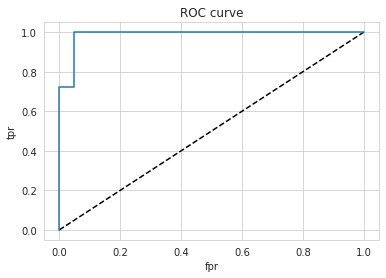

In [76]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [77]:
roc_auc_score(y_test, y_pred_proba)

0.9867724867724869

__-__ Dengesiz datalarda ayni yöntemle precision_recall_curve skorunu da alabiliriz. __--__

### for gridsearchcv model

Yukarida elde ettigimiz GridSearch modeli scikit-learn ile paketleyerek elde etmistik. Bu yuzden GridSearch modelimiz artik bir scikit-learn modeli. Bu model icin roc/auc skoru alabilmek icin ML' deki mantigi kullaniyoruz. ML' deki predict_proba hem 1 hem de 0 olasiligini verdigi icin [:,1] ile 1 class' ina ait olma olasiligini sectik. Sonraki satirlardaki tum islemler yukaridaki ile ayni :

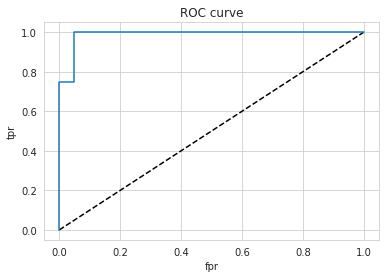

In [78]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

GridSearch modelde elde ettigimiz skor daha yüksek cikti :

In [79]:
roc_auc_score(y_test, y_pred_proba)

0.988095238095238

## Saving Final Model and Scaler

Yine X_train ve y_train' i kullanacagimiz icin final modelde de yukarida olusturdugumuz scaler' i pickle ile dump ettik :

In [80]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

Yukarida aldigimiz en iyi degerler ile final modelimizi kurduk :

In [81]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [82]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

Final modelde yukaridaki modellerden farkli olarak __validation_split__ yerine __validation_data__ kullandik. validation_data' da X_train ve y_train' in son kismindan belirtilen miktar kadarini validation' a ayirir; validation_datada ise X_test ve y_test validation datasi olarak kullanilir.

In [83]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
8/8 [==============================] - 1s 27ms/step - loss: 0.7302 - accuracy: 0.3770 - val_loss: 0.7193 - val_accuracy: 0.3509
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6959 - accuracy: 0.4414 - val_loss: 0.6886 - val_accuracy: 0.4561
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6665 - accuracy: 0.6270 - val_loss: 0.6567 - val_accuracy: 0.6140
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6381 - accuracy: 0.7598 - val_loss: 0.6295 - val_accuracy: 0.7544
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6125 - accuracy: 0.7969 - val_loss: 0.6049 - val_accuracy: 0.7719
Epoch 6/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.5863 - accuracy: 0.8457 - val_loss: 0.5786 - val_accuracy: 0.8421
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.5605 - accuracy: 0.8691 - val_loss: 0.5511 - val_accuracy: 0.8596
Epoch 8/1000
8/8 [=

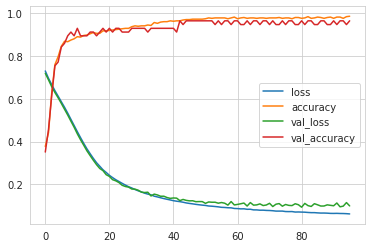

In [84]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [85]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.09878844767808914
accuracy :  0.9649122953414917


In [86]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



Olusturdugumuz final model skorlari oldukca iyi gorunuyor. Bu haliyle modelimizi kaydedebiliriz :

In [87]:
model.save('model_cancer.h5')

## Loading Model and Scaler

In [88]:
from tensorflow.keras.models import load_model

Kaydettigimiz model ve scaler' i prediction almak uzere tekrar load ettik.

In [89]:
model_cancer = load_model('model_cancer.h5')
scaler_cancer = pickle.load(open("scaler_cancer", "rb"))

## Prediction

Target label olan Cancer sütununu datadan atarak datadaki ilk satiri prediction' da kullanmak uzere cektik ve bunu modele vermeden önce transform ile scale islemini uyguladik :

In [90]:
single_patient = df.drop('Cancer', axis = 1).iloc[0:1, :]
single_patient

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,0.162,0.666,0.712,0.265,0.460,0.119


DL modelleri scale edilmis array seklindeki data ile calisir :

In [91]:
single_patient = scaler_cancer.transform(single_patient)
single_patient

array([[0.52103744, 0.0226581 , 0.68000973, 0.7920373 , 0.70313964,
        0.73111332, 0.68636364, 0.60551811, 0.35614702, 0.12046941,
        0.15929565, 0.35139844, 0.13568182, 0.30062512, 0.31164518,
        0.18304244, 0.62077552, 0.14152452, 0.61828432, 0.61929156,
        0.56861022, 0.91202749, 0.59846245, 0.41886396]])

Prediction asamasinda yine >0.5' i belirtiyoruz. 0.5' in uzerinde bir deger cikarsa 1 class' ina; cikmazsa 0 class' ina atama yapacak :

In [92]:
(model_cancer.predict(single_patient) > 0.5).astype("int32")
#model_cancer.predict_classes(single_patient)

array([[0]], dtype=int32)

Prediction ile gercek degeri kiyasladik, ayni sonuc cikti. Roc/Auc' da aldigimiz yuksek skorlar bize 1 ve 0 class' inin ayriminin iyi yapildigi inside' ini vermisti:

In [93]:
df["Cancer"].iloc[0]

0

## Comparison with ML

### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

Data cok buyuk bir data olmadigi icin Logistic Regression ile de DL ile benzer skorlari aldik :

In [95]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



### Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

Random Forest ile de yuksek bir skor elde ettik :

In [97]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___